Mounted at /content/drive


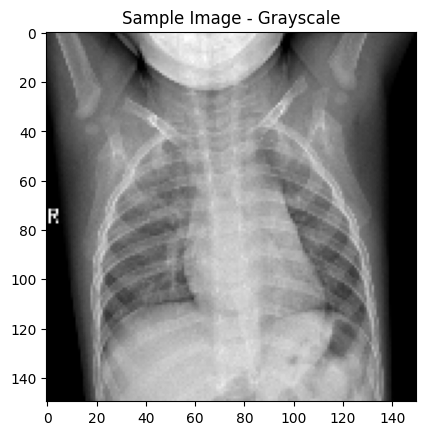

In [1]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')
# Directories for the dataset
base_dir = '/content/drive/MyDrive/PneumoniaDetection/chest_xray/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Function to load and convert images to grayscale
def load_and_convert_to_grayscale(image_dir):
    images = []
    labels = []
    for label in ['NORMAL', 'PNEUMONIA']:
        folder_path = os.path.join(image_dir, label)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            img = cv2.resize(img, (150, 150))  # Resize to 150x150
            images.append(img)
            labels.append(0 if label == 'NORMAL' else 1)
    return np.array(images), np.array(labels)

# Load the data
train_images, train_labels = load_and_convert_to_grayscale(train_dir)
val_images, val_labels = load_and_convert_to_grayscale(val_dir)
test_images, test_labels = load_and_convert_to_grayscale(test_dir)

# Display example image
plt.imshow(train_images[0], cmap='gray')
plt.title('Sample Image - Grayscale')
plt.show()

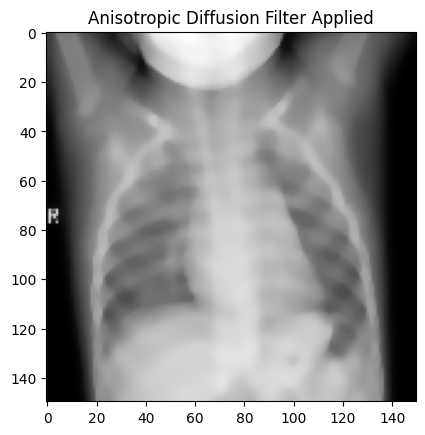

In [2]:
import cv2
from skimage.restoration import denoise_tv_chambolle

def anisotropic_diffusion(image):
    return denoise_tv_chambolle(image, weight=0.1)

# Apply on a sample image
filtered_image = anisotropic_diffusion(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('Anisotropic Diffusion Filter Applied')
plt.show()

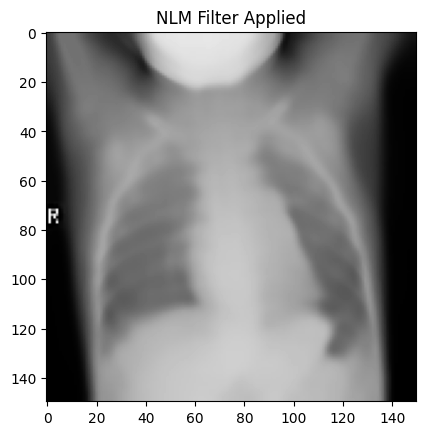

In [3]:
def nlm_filter(image):
    return cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

# Apply on a sample image
filtered_image = nlm_filter(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('NLM Filter Applied')
plt.show()

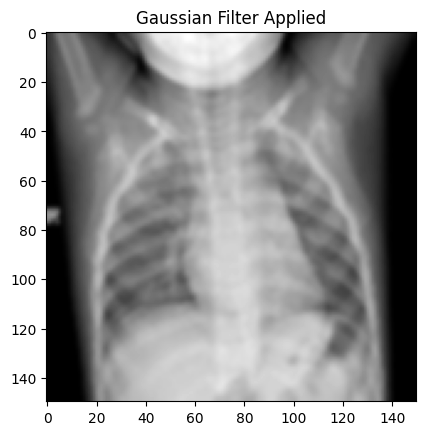

In [4]:
def gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Apply on a sample image
filtered_image = gaussian_filter(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filter Applied')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


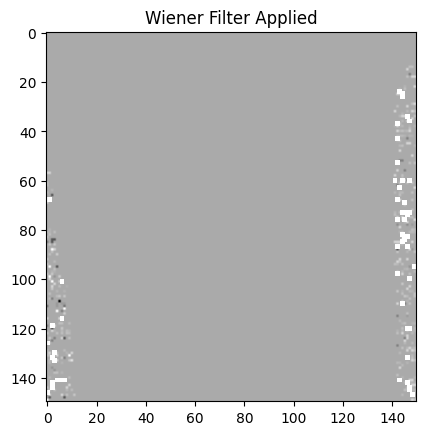

In [5]:
from scipy.signal import wiener

def wiener_filter(image):
    return wiener(image, (5, 5))

# Apply on a sample image
filtered_image = wiener_filter(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('Wiener Filter Applied')
plt.show()

In [6]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import math

#function for  calculating MSE, PSNR, and SSIM
def calculate_metrics(original_image, filtered_image):
    # Calculate MSE
    mse_value = mean_squared_error(original_image, filtered_image)

    # Calculate PSNR
    psnr_value = 20 * math.log10(255.0 / math.sqrt(mse_value))

    # Calculate SSIM (use data_range to specify the range of pixel values)
    ssim_value = ssim(original_image, filtered_image, data_range=original_image.max() - original_image.min())

    return mse_value, psnr_value, ssim_value

# Compare each filter
original_image = train_images[0]

filters = {
    'Anisotropic': anisotropic_diffusion,
    'NLM': nlm_filter,
    'Gaussian': gaussian_filter,
    'Wiener': wiener_filter
}

for filter_name, filter_func in filters.items():
    # Apply the filter
    filtered_image = filter_func(original_image)

    # Calculate metrics
    mse_value, psnr_value, ssim_value = calculate_metrics(original_image, filtered_image)

    # Print the results
    print(f"Filter: {filter_name} -> MSE: {mse_value}, PSNR: {psnr_value}, SSIM: {ssim_value}")

Filter: Anisotropic -> MSE: 19089.75554550465, PSNR: 5.322799938109726, SSIM: 0.05338437810644233
Filter: NLM -> MSE: 130.99502222222222, PSNR: 26.958255679792824, SSIM: 0.6937515845037578
Filter: Gaussian -> MSE: 66.42862222222222, PSNR: 29.90725115915317, SSIM: 0.8939319985935722
Filter: Wiener -> MSE: nan, PSNR: nan, SSIM: nan


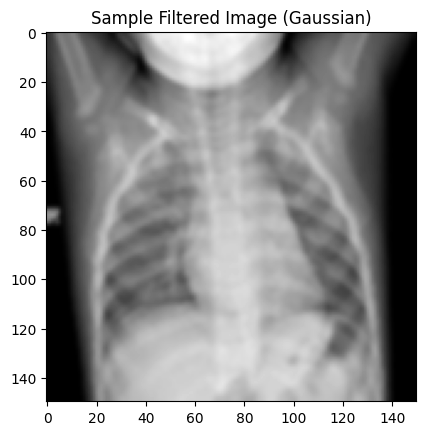

In [7]:
def apply_gaussian_filter(images):
    filtered_images = []
    for img in images:
        filtered_img = cv2.GaussianBlur(img, (5, 5), 0)
        filtered_images.append(filtered_img)
    return np.array(filtered_images)

# Applying Gaussian filter to the train, validation, and test datasets
filtered_train_images = apply_gaussian_filter(train_images)
filtered_val_images = apply_gaussian_filter(val_images)
filtered_test_images = apply_gaussian_filter(test_images)

# Display a sample filtered image
plt.imshow(filtered_train_images[0], cmap='gray')
plt.title('Sample Filtered Image (Gaussian)')
plt.show()

In [8]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import math

# Function to calculate metrics
def calculate_metrics(original_image, filtered_image):
    mse_value = mean_squared_error(original_image, filtered_image)
    psnr_value = 20 * math.log10(255.0 / math.sqrt(mse_value))
    ssim_value = ssim(original_image, filtered_image)
    return mse_value, psnr_value, ssim_value

# Compareing the original and filtered images for a sample image
sample_index = 0
original_image = train_images[sample_index]
filtered_image = filtered_train_images[sample_index]

# Calculate MSE, PSNR, SSIM for the Gaussian filtered image
mse_value, psnr_value, ssim_value = calculate_metrics(original_image, filtered_image)
print(f"Gaussian Filter -> MSE: {mse_value}, PSNR: {psnr_value}, SSIM: {ssim_value}")

Gaussian Filter -> MSE: 66.42862222222222, PSNR: 29.90725115915317, SSIM: 0.8939319985935722


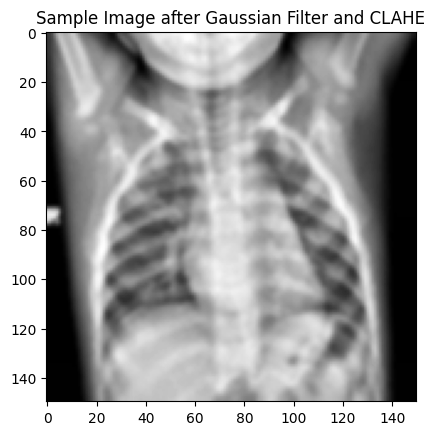

In [9]:
def apply_clahe(images):
    clahe_images = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    for img in images:
        clahe_img = clahe.apply(img)
        clahe_images.append(clahe_img)
    return np.array(clahe_images)

# Apply CLAHE to the filtered images
clahe_train_images = apply_clahe(filtered_train_images)
clahe_val_images = apply_clahe(filtered_val_images)
clahe_test_images = apply_clahe(filtered_test_images)

# Display a sample CLAHE applied image
plt.imshow(clahe_train_images[0], cmap='gray')
plt.title('Sample Image after Gaussian Filter and CLAHE')
plt.show()

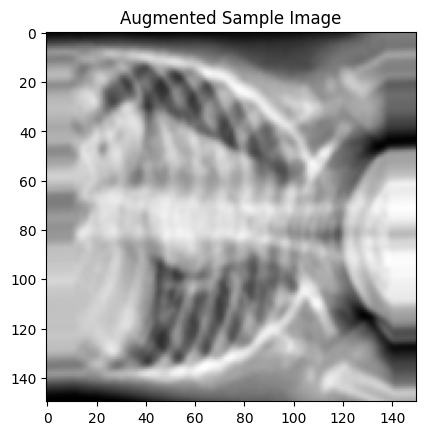

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Define the augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

img = clahe_train_images[0]

# Add a batch dimension (expand to 4D) and channels dimension
img = np.expand_dims(img, axis=(0, -1))  # Adding both batch and channel dimensions

# Generate augmented image
aug_iter = train_datagen.flow(img)
aug_image = next(aug_iter)[0]

# Display the augmented image
plt.imshow(aug_image.squeeze(), cmap='gray')
plt.title('Augmented Sample Image')
plt.show()

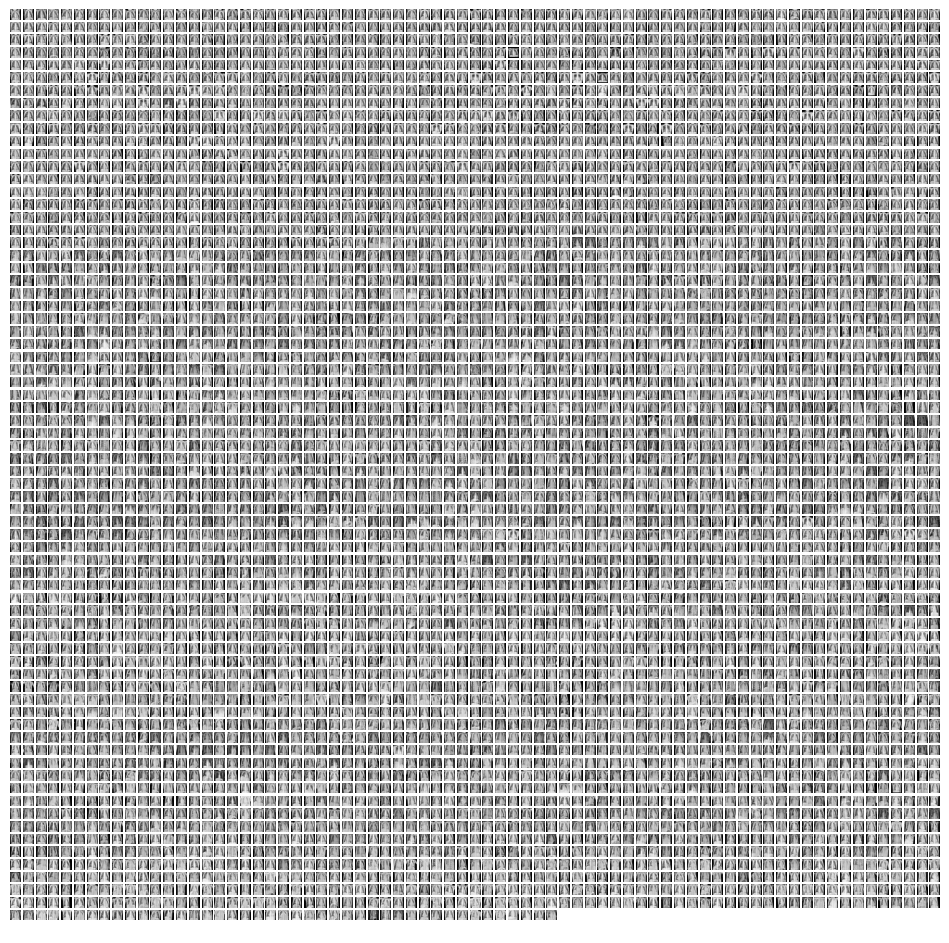

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clahe_train_images is a list or array of images (grayscale)
num_images = len(clahe_train_images)

# Determine the grid size for displaying the images
grid_size = int(np.ceil(np.sqrt(num_images)))  # Square grid

# Create a figure with subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

# Iterate over the images and plot each one
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Get the ith CLAHE image
        img = clahe_train_images[i]

        # Display the image
        ax.imshow(img, cmap='gray')

    # Remove axes for unused subplots
    ax.axis('off')

# Adjust layout (manually adjusted spacing instead of tight_layout)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [12]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis


def extract_statistical_features(image):
    # Flatten the image to 1D array
    flat_image = image.flatten()

    # Mean
    mean_val = np.mean(flat_image)

    # Variance
    variance_val = np.var(flat_image)

    # Skewness
    skewness_val = skew(flat_image)

    # Kurtosis
    kurtosis_val = kurtosis(flat_image)

    return [mean_val, variance_val, skewness_val, kurtosis_val]

statistical_features = []
for img in filtered_train_images:
    features = extract_statistical_features(img)
    statistical_features.append(features)

print(f"Sample statistical features: {statistical_features[0]}")

Sample statistical features: [122.54622222222223, 4070.3297301728394, -0.5353650551300617, -0.6643365972926221]


In [13]:
!pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.3 MB/s eta 0:00:00


In [14]:
import mahotas

# Function to extract texture features using Mahotas GLCM
def extract_glcm_features_mahotas(image):
    # Calculate GLCM using Mahotas
    glcm = mahotas.features.haralick(image)

    # Extract the mean of Haralick features (texture features)
    mean_features = glcm.mean(axis=0)

    return mean_features

texture_features = []
for img in filtered_train_images:
    features = extract_glcm_features_mahotas(img)
    texture_features.append(features)

print(f"Sample texture features (Mahotas): {texture_features[0]}")

Sample texture features (Mahotas): [ 6.54444779e-03  5.53543775e+01  9.93084241e-01  4.01229432e+03
  2.75451101e-01  2.46141480e+02  1.59938229e+04  8.33863122e+00
  1.14658887e+01  3.69784713e-04  3.83714091e+00 -4.52543713e-01
  9.99288059e-01]


In [15]:
def extract_edge_features(image):
    # Apply Sobel filter to detect edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # X-axis
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Y-axis

    # Combine the edge information
    sobel_combined = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

    # Sum and standard deviation of edge intensity values
    edge_sum = np.sum(sobel_combined)
    edge_std = np.std(sobel_combined)

    return [edge_sum, edge_std]

edge_features = []
for img in filtered_train_images:
    features = extract_edge_features(img)
    edge_features.append(features)

print(f"Sample edge features: {edge_features[0]}")

Sample edge features: [16689159.501737725, 632.7669027500696]


In [16]:
from skimage.feature import hog
# Function to extract HOG features
def extract_hog_features(image):
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    return features

hog_features = []
for img in filtered_train_images:
    features = extract_hog_features(img)
    hog_features.append(features)

print(f"Sample HOG features: {hog_features[0][:10]}")  # Print the first 10 HOG features

Sample HOG features: [0.30767672 0.         0.00402889 0.00318512 0.00854658 0.
 0.01717859 0.11427757 0.42429945 0.18104357]


In [17]:
def extract_all_features(image):
    statistical = extract_statistical_features(image)
    texture = extract_glcm_features_mahotas(image)
    edge = extract_edge_features(image)
    hog = extract_hog_features(image)

    # Concatenate all features into a single array
    return np.concatenate([statistical, texture, edge, hog])

# Extract features for all images in the dataset
all_features = []
for img in filtered_train_images:
    features = extract_all_features(img)
    all_features.append(features)

all_features = np.array(all_features)
print(f"Feature shape: {all_features.shape}")

Feature shape: (5226, 10423)


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# Scale the features using StandardScaler (cross-validation should be done on scaled data)
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1, probability=True)  # Enable probability estimation for ROC

# Perform K-Fold Cross-Validation (using 5 folds as an example)
cv_scores = cross_val_score(svm_classifier, all_features_scaled, train_labels, cv=5, scoring='accuracy')

# Print cross-validation scores and the average score
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.96845124 0.97033493 0.96650718 0.97703349 0.96937799]
Average Cross-Validation Accuracy: 0.9703409662693149


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, train_labels, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1, probability=True)
svm_classifier.fit(X_train_scaled, y_train)

# Now you can use the trained model for both confusion matrix and ROC/AUC evaluations


SVC(C=1, kernel='linear', probability=True)

Accuracy on Test Set: 0.9674952198852772
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       288
           1       0.98      0.98      0.98       758

    accuracy                           0.97      1046
   macro avg       0.96      0.96      0.96      1046
weighted avg       0.97      0.97      0.97      1046



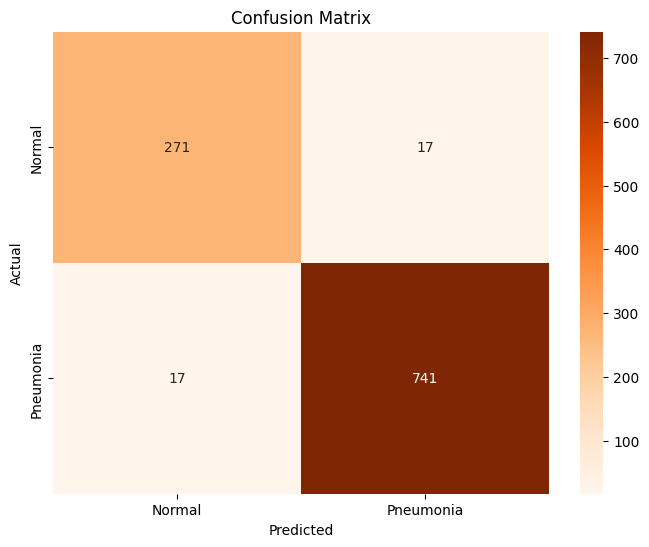

In [63]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


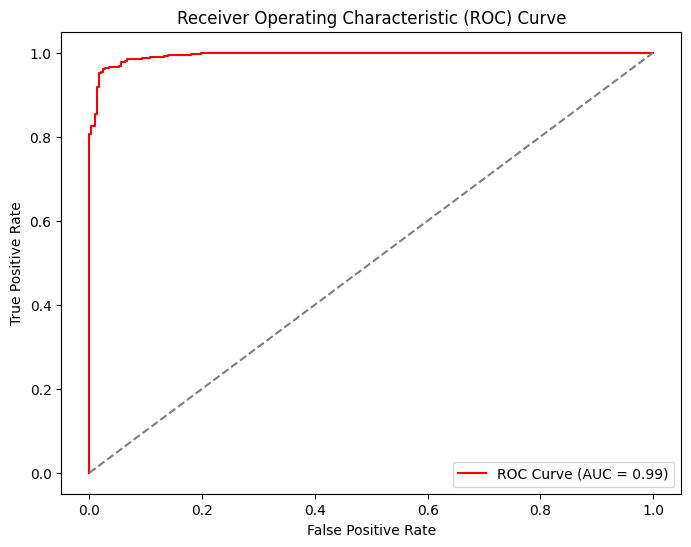

AUC (Area Under the Curve): 0.99


In [52]:
# Predict on the test set and get probabilities for ROC curve
y_pred_prob = svm_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (Pneumonia)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC (Area Under the Curve): {auc:.2f}")


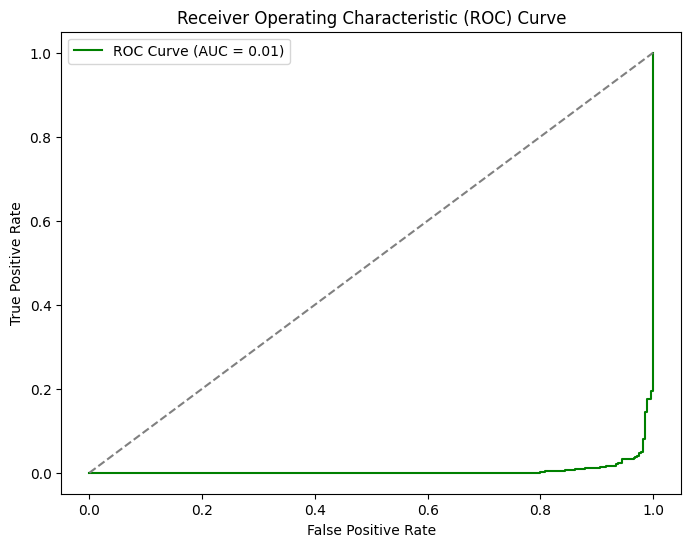

AUC (Area Under the Curve): 0.01


In [51]:
# Predict on the test set and get probabilities for ROC curve
y_pred_prob = svm_classifier.predict_proba(X_test_scaled)[:, 0]  # Probabilities for class 0 (Normal)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()

# Print AUC score
print(f"AUC (Area Under the Curve): {auc:.2f}")


various plots and curves